In [44]:
# Import all the necessary libraries
import tellurium as te
import numpy as np
from sympy import Matrix
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank
import pandas as pd
import seaborn as sns
%matplotlib inline

## Simulating the squeezed model slices (first approach)

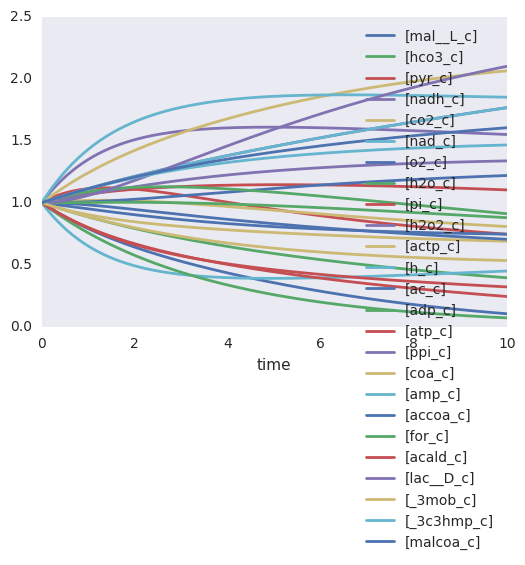

<module 'matplotlib.pyplot' from '/home/marie/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [25]:
# load model g4
path2sbml_g4 = "g4_squeezer.xml"
model_g4 = te.loadSBMLModel(path2sbml_g4)

# simulate model g4
sim_g4 = model_g4.simulate(0,10,100000)

# plot model g4
model_g4.plot(sim_g4)

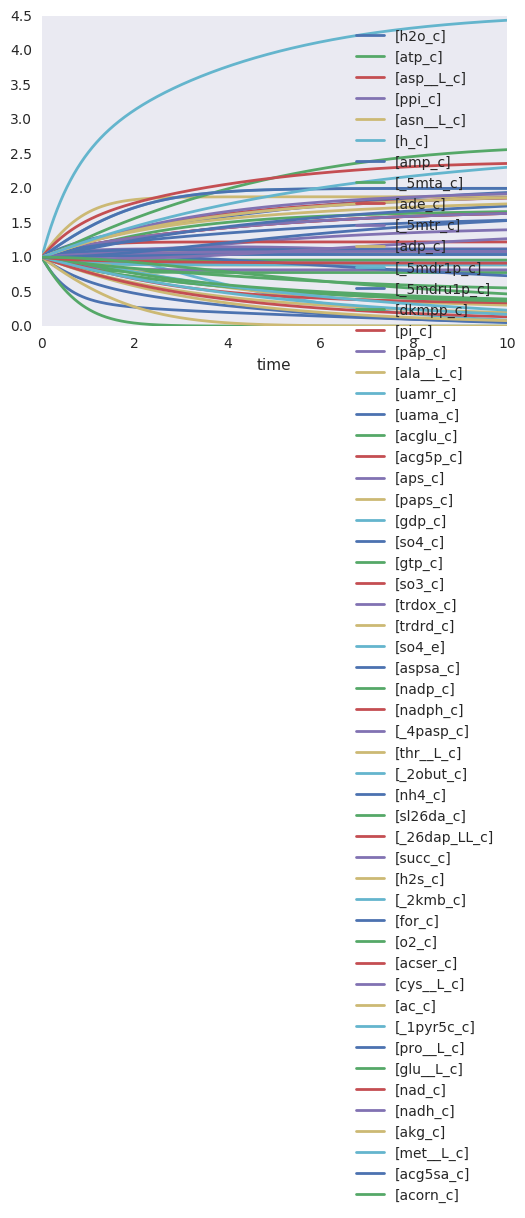

<module 'matplotlib.pyplot' from '/home/marie/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [26]:
# load model g6
path2sbml_g6 = "g6_squeezer.xml"
model_g6 = te.loadSBMLModel(path2sbml_g6)

# simulate model g6
sim_g6 = model_g6.simulate(0,10,100000)

# plot model g6
model_g6.plot(sim_g6)

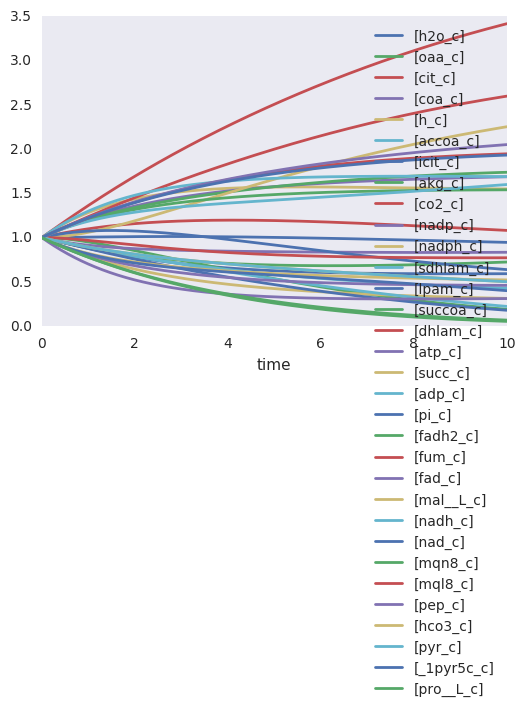

<module 'matplotlib.pyplot' from '/home/marie/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [27]:
# load model g12
path2sbml_g12 = "g12_squeezer.xml"
model_g12 = te.loadSBMLModel(path2sbml_g12)

# simulate model g12
sim_g12 = model_g12.simulate(0,10,100000)

# plot model g12
model_g12.plot(sim_g12)

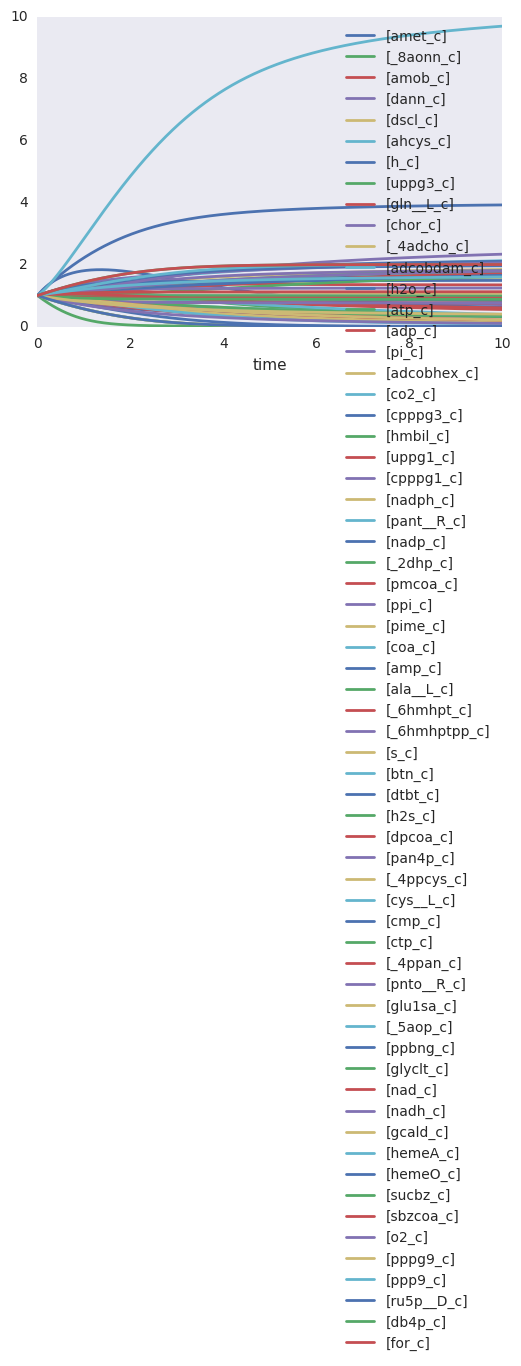

<module 'matplotlib.pyplot' from '/home/marie/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [28]:
# load model g14
path2sbml_g14 = "g14_squeezer.xml"
model_g14 = te.loadSBMLModel(path2sbml_g14)

# simulate model g14
sim_g14 = model_g14.simulate(0,10,100000)

# plot model g14
model_g14.plot(sim_g14)

## Calculating the rank of the stoichiometric matrices

In [29]:
matrix_g4 = model_g4.getFullStoichiometryMatrix()
# print matrix_g4
print("Rank of model g04: %i" %(matrix_rank(matrix_g4)))

matrix_g6 = model_g6.getFullStoichiometryMatrix()
# print matrix_g6
print("Rank of model g06: %i" %(matrix_rank(matrix_g6)))

matrix_g12 = model_g12.getFullStoichiometryMatrix()
# print matrix_g12
print("Rank of model g12: %i" %(matrix_rank(matrix_g12)))

matrix_g14 = model_g14.getFullStoichiometryMatrix()
# print matrix_g14
print("Rank of model g14: %i" %(matrix_rank(matrix_g14)))

Rank of model g04: 11
Rank of model g06: 23
Rank of model g12: 14
Rank of model g14: 25


## Creating heatmaps

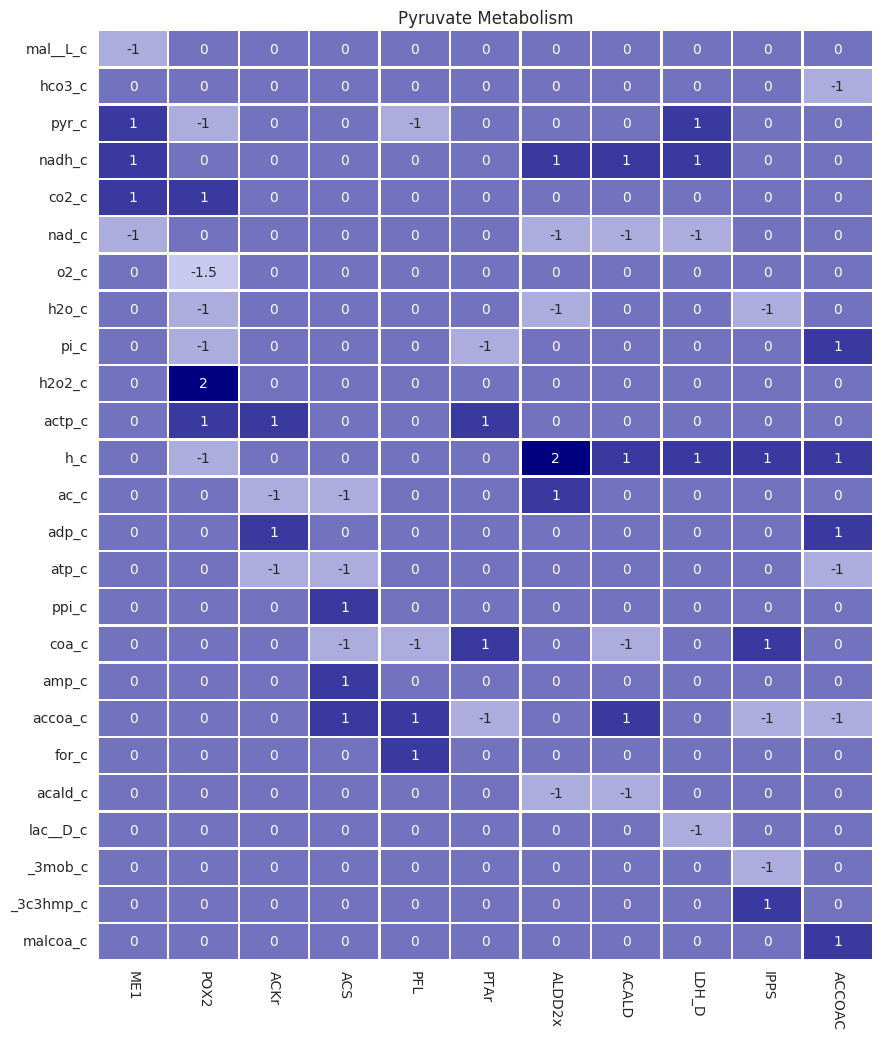

In [30]:
# Creating pandas data frame
matrix_g4_df = pd.DataFrame(matrix_g4, index=matrix_g4.rownames, columns=matrix_g4.colnames)

# Changing the color palette to navy blue
pal = sns.light_palette("navy", as_cmap=True)
ax = sns.heatmap(matrix_g4_df, linewidths=1, annot=True, cmap=pal, cbar=False)

# Rotate the labels for better legibility
plt.xticks(rotation=-90)
plt.title("Pyruvate Metabolism")

# Creating and saving the respective figure
fig = ax.get_figure()
fig.set_size_inches(10, 12)
fig.savefig("heatmap_g4.png")

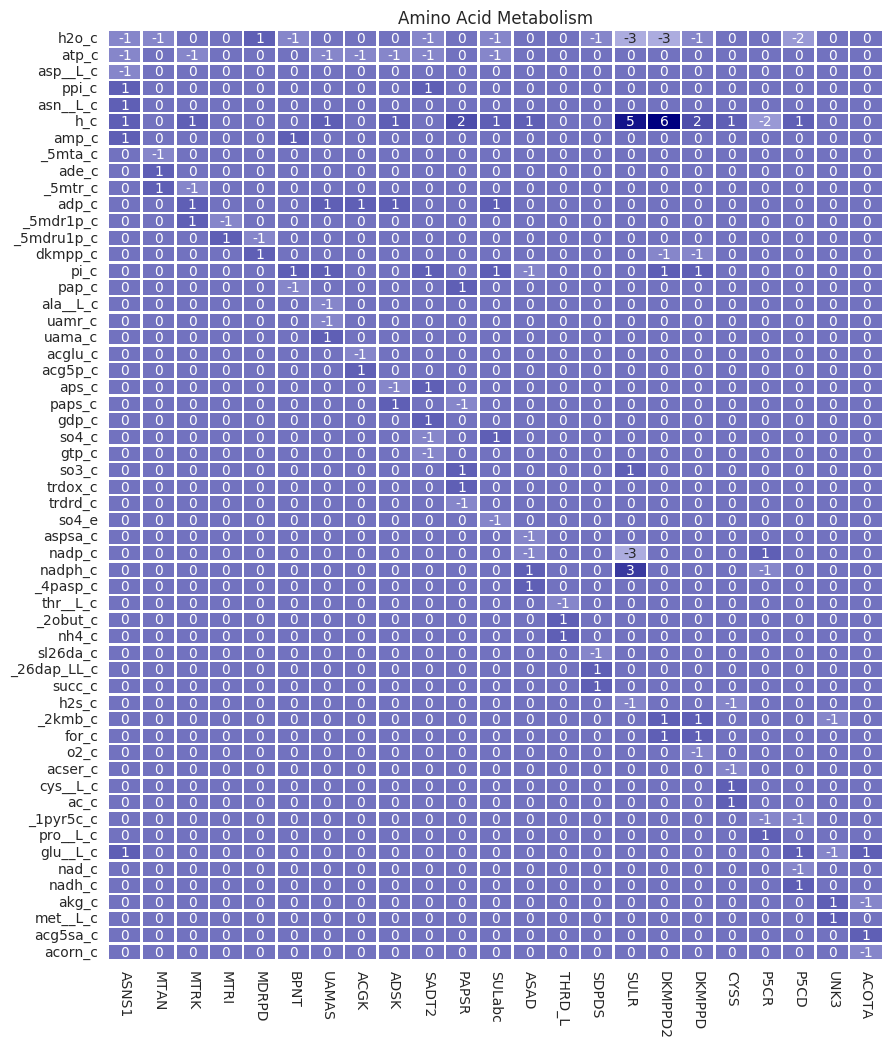

In [31]:
# Creating pandas data frame
matrix_g6_df = pd.DataFrame(matrix_g6, index=matrix_g6.rownames, columns=matrix_g6.colnames)

# Changing the color palette to navy blue
pal = sns.light_palette("navy", as_cmap=True)
ax = sns.heatmap(matrix_g6_df, linewidths=1, annot=True, cmap=pal, cbar=False)

# Rotate the labels for better legibility
plt.xticks(rotation=-90)
plt.title("Amino Acid Metabolism")

# Creating and saving the respective figure
fig = ax.get_figure()
fig.set_size_inches(10, 12)
fig.savefig("heatmap_g6.png")

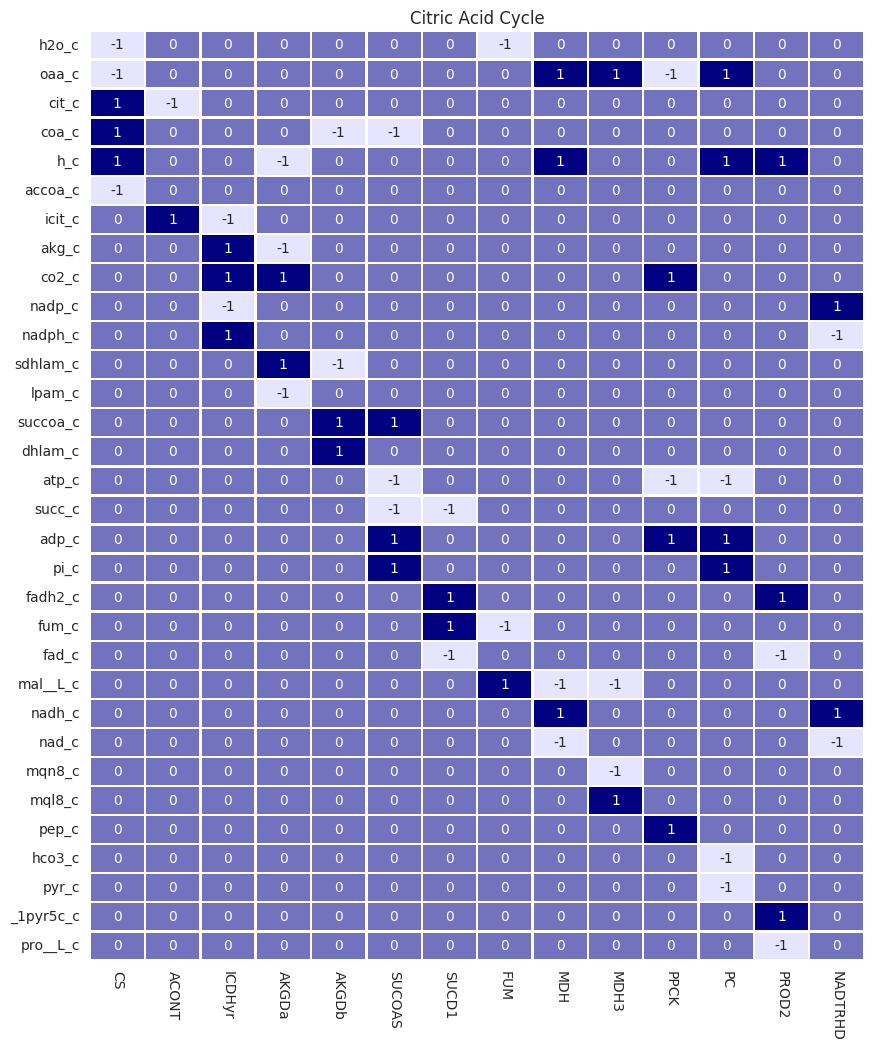

In [32]:
# Creating pandas data frame
matrix_g12_df = pd.DataFrame(matrix_g12, index=matrix_g12.rownames, columns=matrix_g12.colnames)

# Changing the color palette to navy blue
pal = sns.light_palette("navy", as_cmap=True)
ax = sns.heatmap(matrix_g12_df, linewidths=1, annot=True, cmap=pal, cbar=False)

# Rotate the labels for better legibility
plt.xticks(rotation=-90)
plt.title("Citric Acid Cycle")

# Creating and saving the respective figure
fig = ax.get_figure()
fig.set_size_inches(10, 12)
fig.savefig("heatmap_g12.png")

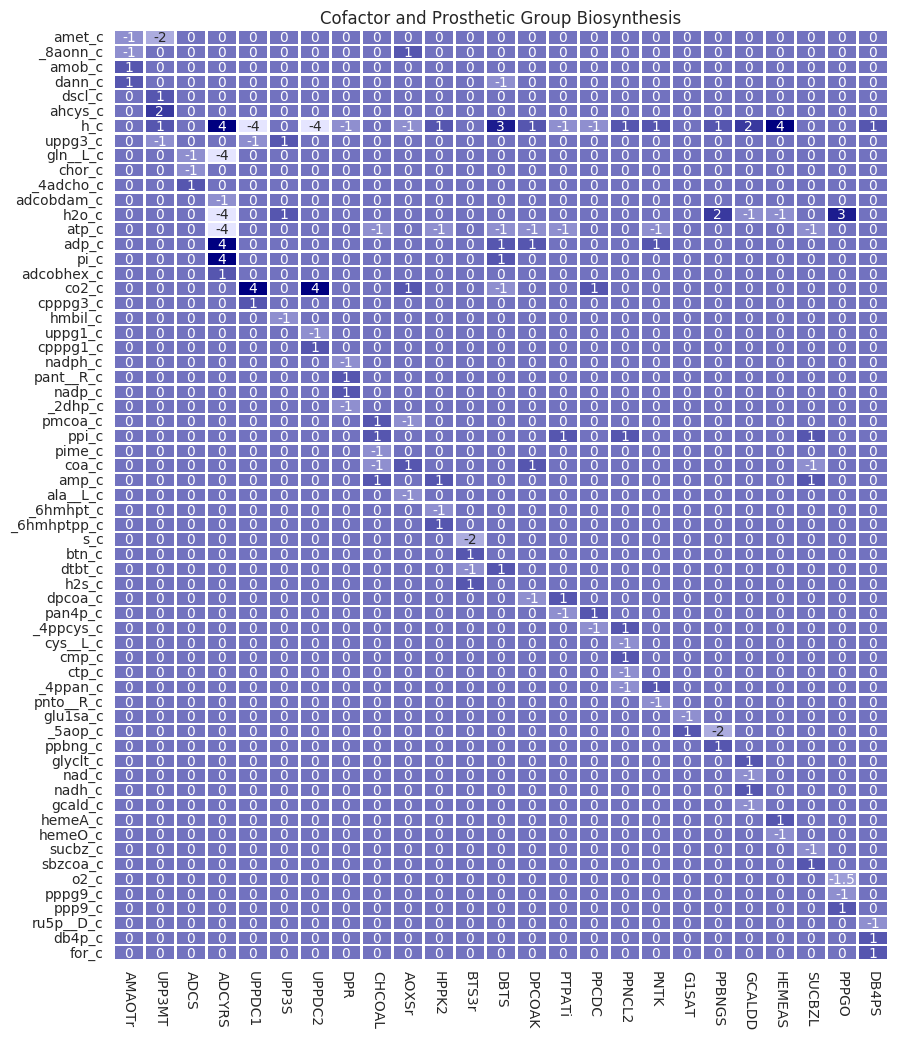

In [33]:
# Creating pandas data frame
matrix_g14_df = pd.DataFrame(matrix_g14, index=matrix_g14.rownames, columns=matrix_g14.colnames)

# Changing the color palette to navy blue
pal = sns.light_palette("navy", as_cmap=True)
ax = sns.heatmap(matrix_g14_df, linewidths=1, annot=True, cmap=pal, cbar=False)

# Rotate the labels for better legibility
plt.xticks(rotation=-90)
plt.title("Cofactor and Prosthetic Group Biosynthesis")

# Creating and saving the respective figure
fig = ax.get_figure()
fig.set_size_inches(10, 12)
fig.savefig("heatmap_g14.png")

## Conservation Relationships

In [34]:
# Retrieve transposed matrix for model g4
getMatrix_g4 = (Matrix(matrix_g4)).T
# print getMatrix_g4

# Determine leftnullspace of g4
leftNullspace_g4 = getMatrix_g4.nullspace()
print 'Conservation relationships of the pyruvate metabolism (subsystem g4):\n'

# Determine the conservartion relationships of g4
for relationships in leftNullspace_g4:
    all_relationships = ""
    for i in range(0, len(relationships)):
        if relationships[i] != 0:
            all_relationships += "%.1f %s + "%(relationships[i], matrix_g4.rownames[i])
    print all_relationships[0:-2]

Conservation relationships of the pyruvate metabolism (subsystem g4):

1.0 nadh_c + 1.0 nad_c 
1.5 mal__L_c + 1.5 co2_c + 1.0 o2_c 
-2.0 mal__L_c + -2.0 co2_c + 1.0 h2o2_c 
1.0 mal__L_c + 1.0 hco3_c + -1.0 nadh_c + 2.0 co2_c + 1.0 h2o_c + 1.0 h_c 
-1.0 pi_c + -1.0 actp_c + 1.0 adp_c 
1.0 pi_c + 1.0 actp_c + 1.0 atp_c + 1.0 ppi_c 
1.0 mal__L_c + 1.0 hco3_c + -1.0 pyr_c + 1.0 nadh_c + 1.0 co2_c + 1.0 h2o_c + -1.0 actp_c + -1.0 atp_c + 1.0 coa_c 
1.0 pi_c + 1.0 actp_c + 1.0 atp_c + 1.0 amp_c 
-1.0 mal__L_c + -2.0 hco3_c + 1.0 pyr_c + -1.0 nadh_c + -1.0 co2_c + -1.0 h2o_c + 1.0 actp_c + 1.0 atp_c + 1.0 accoa_c 
-1.0 mal__L_c + -1.0 pyr_c + 1.0 nadh_c + -1.0 co2_c + -1.0 for_c + 1.0 acald_c 
2.0 mal__L_c + 1.0 pyr_c + 1.0 co2_c + 1.0 for_c + 1.0 lac__D_c 
-1.0 mal__L_c + -1.0 hco3_c + -1.0 co2_c + -1.0 h2o_c + -1.0 ac_c + 1.0 atp_c + 1.0 _3mob_c 
1.0 mal__L_c + 1.0 hco3_c + 1.0 co2_c + 1.0 h2o_c + 1.0 ac_c + -1.0 atp_c + 1.0 _3c3hmp_c 
1.0 hco3_c + 1.0 malcoa_c 


In [38]:
# Retrieve transposed matrix for model g6
getMatrix_g6 = (Matrix(matrix_g6)).T
# print getMatrix_g6

# Determine leftnullspace of g6
leftNullspace_g6 = getMatrix_g6.nullspace()
print 'Conservation relationships of the amino acid metabolism (subsystem g6):\n'

# Determine the conservartion relationships of g6
for relationships in leftNullspace_g6:
    all_relationships = ""
    for i in range(0, len(relationships)):
        if relationships[i] != 0:
            all_relationships += "%.1f %s + "%(relationships[i], matrix_g6.rownames[i])
    print all_relationships[0:-2]

Conservation relationships of the amino acid metabolism (subsystem g6):

1.0 asp__L_c + 1.0 asn__L_c 
1.0 _5mta_c + 1.0 ade_c 
1.0 atp_c + 1.0 ppi_c + 1.0 adp_c 
-1.0 ala__L_c + 1.0 uamr_c 
1.0 ala__L_c + 1.0 uama_c 
1.0 acglu_c + 1.0 acg5p_c 
-1.0 ppi_c + 1.0 amp_c + 1.0 pap_c + 1.0 aps_c + 1.0 paps_c 
-1.0 asp__L_c + -1.0 ppi_c + 1.0 gdp_c 
1.0 atp_c + 2.0 asp__L_c + 3.0 ppi_c + -1.0 _5mta_c + -1.0 _5mtr_c + -1.0 ala__L_c + -1.0 acglu_c + -1.0 aps_c + 1.0 so4_c 
1.0 asp__L_c + 1.0 ppi_c + 1.0 gtp_c 
-1.0 asp__L_c + -1.0 amp_c + -1.0 pap_c + 1.0 trdox_c 
1.0 asp__L_c + 1.0 amp_c + 1.0 pap_c + 1.0 trdrd_c 
-1.0 atp_c + -1.0 asp__L_c + -2.0 ppi_c + 1.0 _5mta_c + 1.0 _5mtr_c + 1.0 ala__L_c + 1.0 acglu_c + 1.0 aps_c + 1.0 so4_e 
-1.0 atp_c + 1.0 asp__L_c + -1.0 ppi_c + 1.0 amp_c + -1.0 _5mdr1p_c + -1.0 _5mdru1p_c + -1.0 dkmpp_c + -1.0 pi_c + 1.0 acglu_c + 1.0 aps_c + 1.0 aspsa_c 
1.0 nadp_c + 1.0 nadph_c 
1.0 atp_c + -1.0 asp__L_c + 1.0 ppi_c + -1.0 amp_c + 1.0 _5mdr1p_c + 1.0 _5mdru1p_c 

In [39]:
# Retrieve transposed matrix for model g12
getMatrix_g12 = (Matrix(matrix_g12)).T
# print getMatrix_g12

# Determine leftnullspace of g12
leftNullspace_g12 = getMatrix_g12.nullspace()
print 'Conservation relationships of the citric acid cycle (subsystem g12):\n'

# Determine the conservartion relationships of g12
for relationships in leftNullspace_g12:
    all_relationships = ""
    for i in range(0, len(relationships)):
        if relationships[i] != 0:
            all_relationships += "%.1f %s + "%(relationships[i], matrix_g12.rownames[i])
    print all_relationships[0:-2]

Conservation relationships of the citric acid cycle (subsystem g12):

1.0 nadp_c + 1.0 nadph_c 
-1.0 cit_c + -1.0 accoa_c + -1.0 icit_c + -1.0 akg_c + 1.0 lpam_c 
1.0 coa_c + 1.0 accoa_c + 1.0 succoa_c 
1.0 cit_c + 1.0 accoa_c + 1.0 icit_c + 1.0 akg_c + 1.0 sdhlam_c + 1.0 dhlam_c 
1.0 atp_c + 1.0 adp_c 
2.0 cit_c + 2.0 accoa_c + 2.0 icit_c + 1.0 akg_c + 1.0 co2_c + 1.0 atp_c + 1.0 pi_c 
-1.0 h2o_c + 1.0 cit_c + -1.0 coa_c + 1.0 accoa_c + 1.0 icit_c + 1.0 akg_c + 1.0 sdhlam_c + 1.0 succ_c + 1.0 fum_c 
1.0 fadh2_c + 1.0 fad_c 
1.0 h2o_c + 1.0 oaa_c + 5.0 cit_c + -1.0 coa_c + 2.0 accoa_c + 5.0 icit_c + 3.0 akg_c + 2.0 co2_c + 1.0 sdhlam_c + 1.0 atp_c + 1.0 mal__L_c 
-1.0 h_c + -1.0 accoa_c + -1.0 co2_c + -1.0 nadp_c + -1.0 atp_c + 1.0 succ_c + 1.0 fadh2_c + 1.0 nadh_c 
1.0 h_c + 1.0 accoa_c + 1.0 co2_c + 1.0 nadp_c + 1.0 atp_c + -1.0 succ_c + -1.0 fadh2_c + 1.0 nad_c 
1.0 oaa_c + 4.0 cit_c + -1.0 coa_c + -1.0 h_c + 1.0 accoa_c + 4.0 icit_c + 3.0 akg_c + 1.0 co2_c + 1.0 sdhlam_c + 1.0 succ

In [40]:
# Retrieve transposed matrix for model g14
getMatrix_g14 = (Matrix(matrix_g14)).T
# print getMatrix_g4

# Determine leftnullspace of g14
leftNullspace_g14 = getMatrix_g14.nullspace()
print 'Conservation relationships of cofactor and prosthetic group biosynthesis (subsystem g14):\n'

# Determine the conservartion relationships of g14
for relationships in leftNullspace_g14:
    all_relationships = ""
    for i in range(0, len(relationships)):
        if relationships[i] != 0:
            all_relationships += "%.1f %s + "%(relationships[i], matrix_g14.rownames[i])
    print all_relationships[0:-2]

Conservation relationships of cofactor and prosthetic group biosynthesis (subsystem g14):

0.5 amet_c + 0.5 amob_c + 1.0 dscl_c 
1.0 amet_c + 1.0 amob_c + 1.0 ahcys_c 
1.0 chor_c + 1.0 _4adcho_c 
-0.2 gln__L_c + 0.2 chor_c + 1.0 adcobdam_c 
-1.0 amob_c + 1.0 dann_c + 1.0 gln__L_c + -1.0 chor_c + 1.0 pi_c 
0.2 gln__L_c + -0.2 chor_c + 1.0 adcobhex_c 
-0.5 amet_c + -0.5 amob_c + 1.0 uppg3_c + 1.0 cpppg3_c + 1.0 hmbil_c 
1.0 uppg1_c + 1.0 cpppg1_c 
1.0 nadph_c + 1.0 pant__R_c 
1.0 nadph_c + 1.0 nadp_c 
-1.0 nadph_c + 1.0 _2dhp_c 
1.0 _8aonn_c + 1.0 amob_c + 1.0 pmcoa_c + 1.0 pime_c 
1.0 _8aonn_c + 1.0 amob_c + 1.0 ala__L_c 
1.0 _6hmhpt_c + 1.0 _6hmhptpp_c 
0.5 s_c + 1.0 btn_c 
-1.0 amob_c + 1.0 dann_c + -0.5 s_c + 1.0 dtbt_c 
0.5 s_c + 1.0 h2s_c 
-1.0 _8aonn_c + -1.0 amob_c + -0.0 dann_c + 0.0 gln__L_c + -0.0 chor_c + 1.0 atp_c + 1.0 adp_c + 1.0 coa_c + 2.0 amp_c + 1.0 _6hmhpt_c + 1.0 dpcoa_c 
1.0 _8aonn_c + 1.0 dann_c + -1.0 atp_c + -1.0 adp_c + -1.0 co2_c + 4.0 cpppg3_c + -4.0 uppg1_c +

## Eigenvalue calculation

In [35]:
# Calculate the eigenvalues for model g4
eigenvals_g4 = model_g4.getFullEigenValues() 
print "Eigenvalues of model g4: \n", eigenvals_g4, "\n"

# Calculate the eigenvalues for model g6
eigenvals_g6 = model_g6.getFullEigenValues() 
print "Eigenvalues of model g6: \n", eigenvals_g6, "\n"

# Calculate the eigenvalues for model g12
eigenvals_g12 = model_g12.getFullEigenValues() 
print "Eigenvalues of model g12: \n", eigenvals_g12, "\n"

# Calculate the eigenvalues for model g14
eigenvals_g14 = model_g14.getFullEigenValues() 
print "Eigenvalues of model g14: \n", eigenvals_g14

Eigenvalues of model g4: 
[-0.99602026 -0.77063025 -0.56963995 -0.26905151 -0.24040008 -0.20512345
 -0.0851095  -0.08076109 -0.0370771  -0.00964147 -0.00256998  0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ] 

Eigenvalues of model g6: 
[-2.33043615+0.j -1.76057897+0.j -1.21833947+0.j -0.58314329+0.j
 -0.33007002+0.j -0.24351779+0.j -0.15531851+0.j -0.21084910+0.j
 -0.70119252+0.j -0.02844348+0.j -0.02096534+0.j -0.01628301+0.j
 -0.00054269+0.j -0.21149947+0.j -0.00010092+0.j -0.03081460+0.j
 -0.00000000+0.j -0.00000001+0.j -0.00000001+0.j -0.00000000+0.j
 -0.00000000-0.j -0.00000000+0.j  0.00000000+0.j  0.00000000+0.j
  0.00000000+0.j  0.00000000+0.j  0.00000000+0.j  0.00000000+0.j
  0.00000000+0.j  0.00000000+0.j  0.00000000+0.j  0.00000000+0.j
  0.00000000+0.j  0.00000000+0.j  0.00000000+0.j  0.00000000+0.j
  0.00000000+0.j  0.00000000+0.j  0.00000000+0.j  0.00000000+0.j
  0.000

------------

# Same operations as above, but for entire model

Rank of entire model: 57


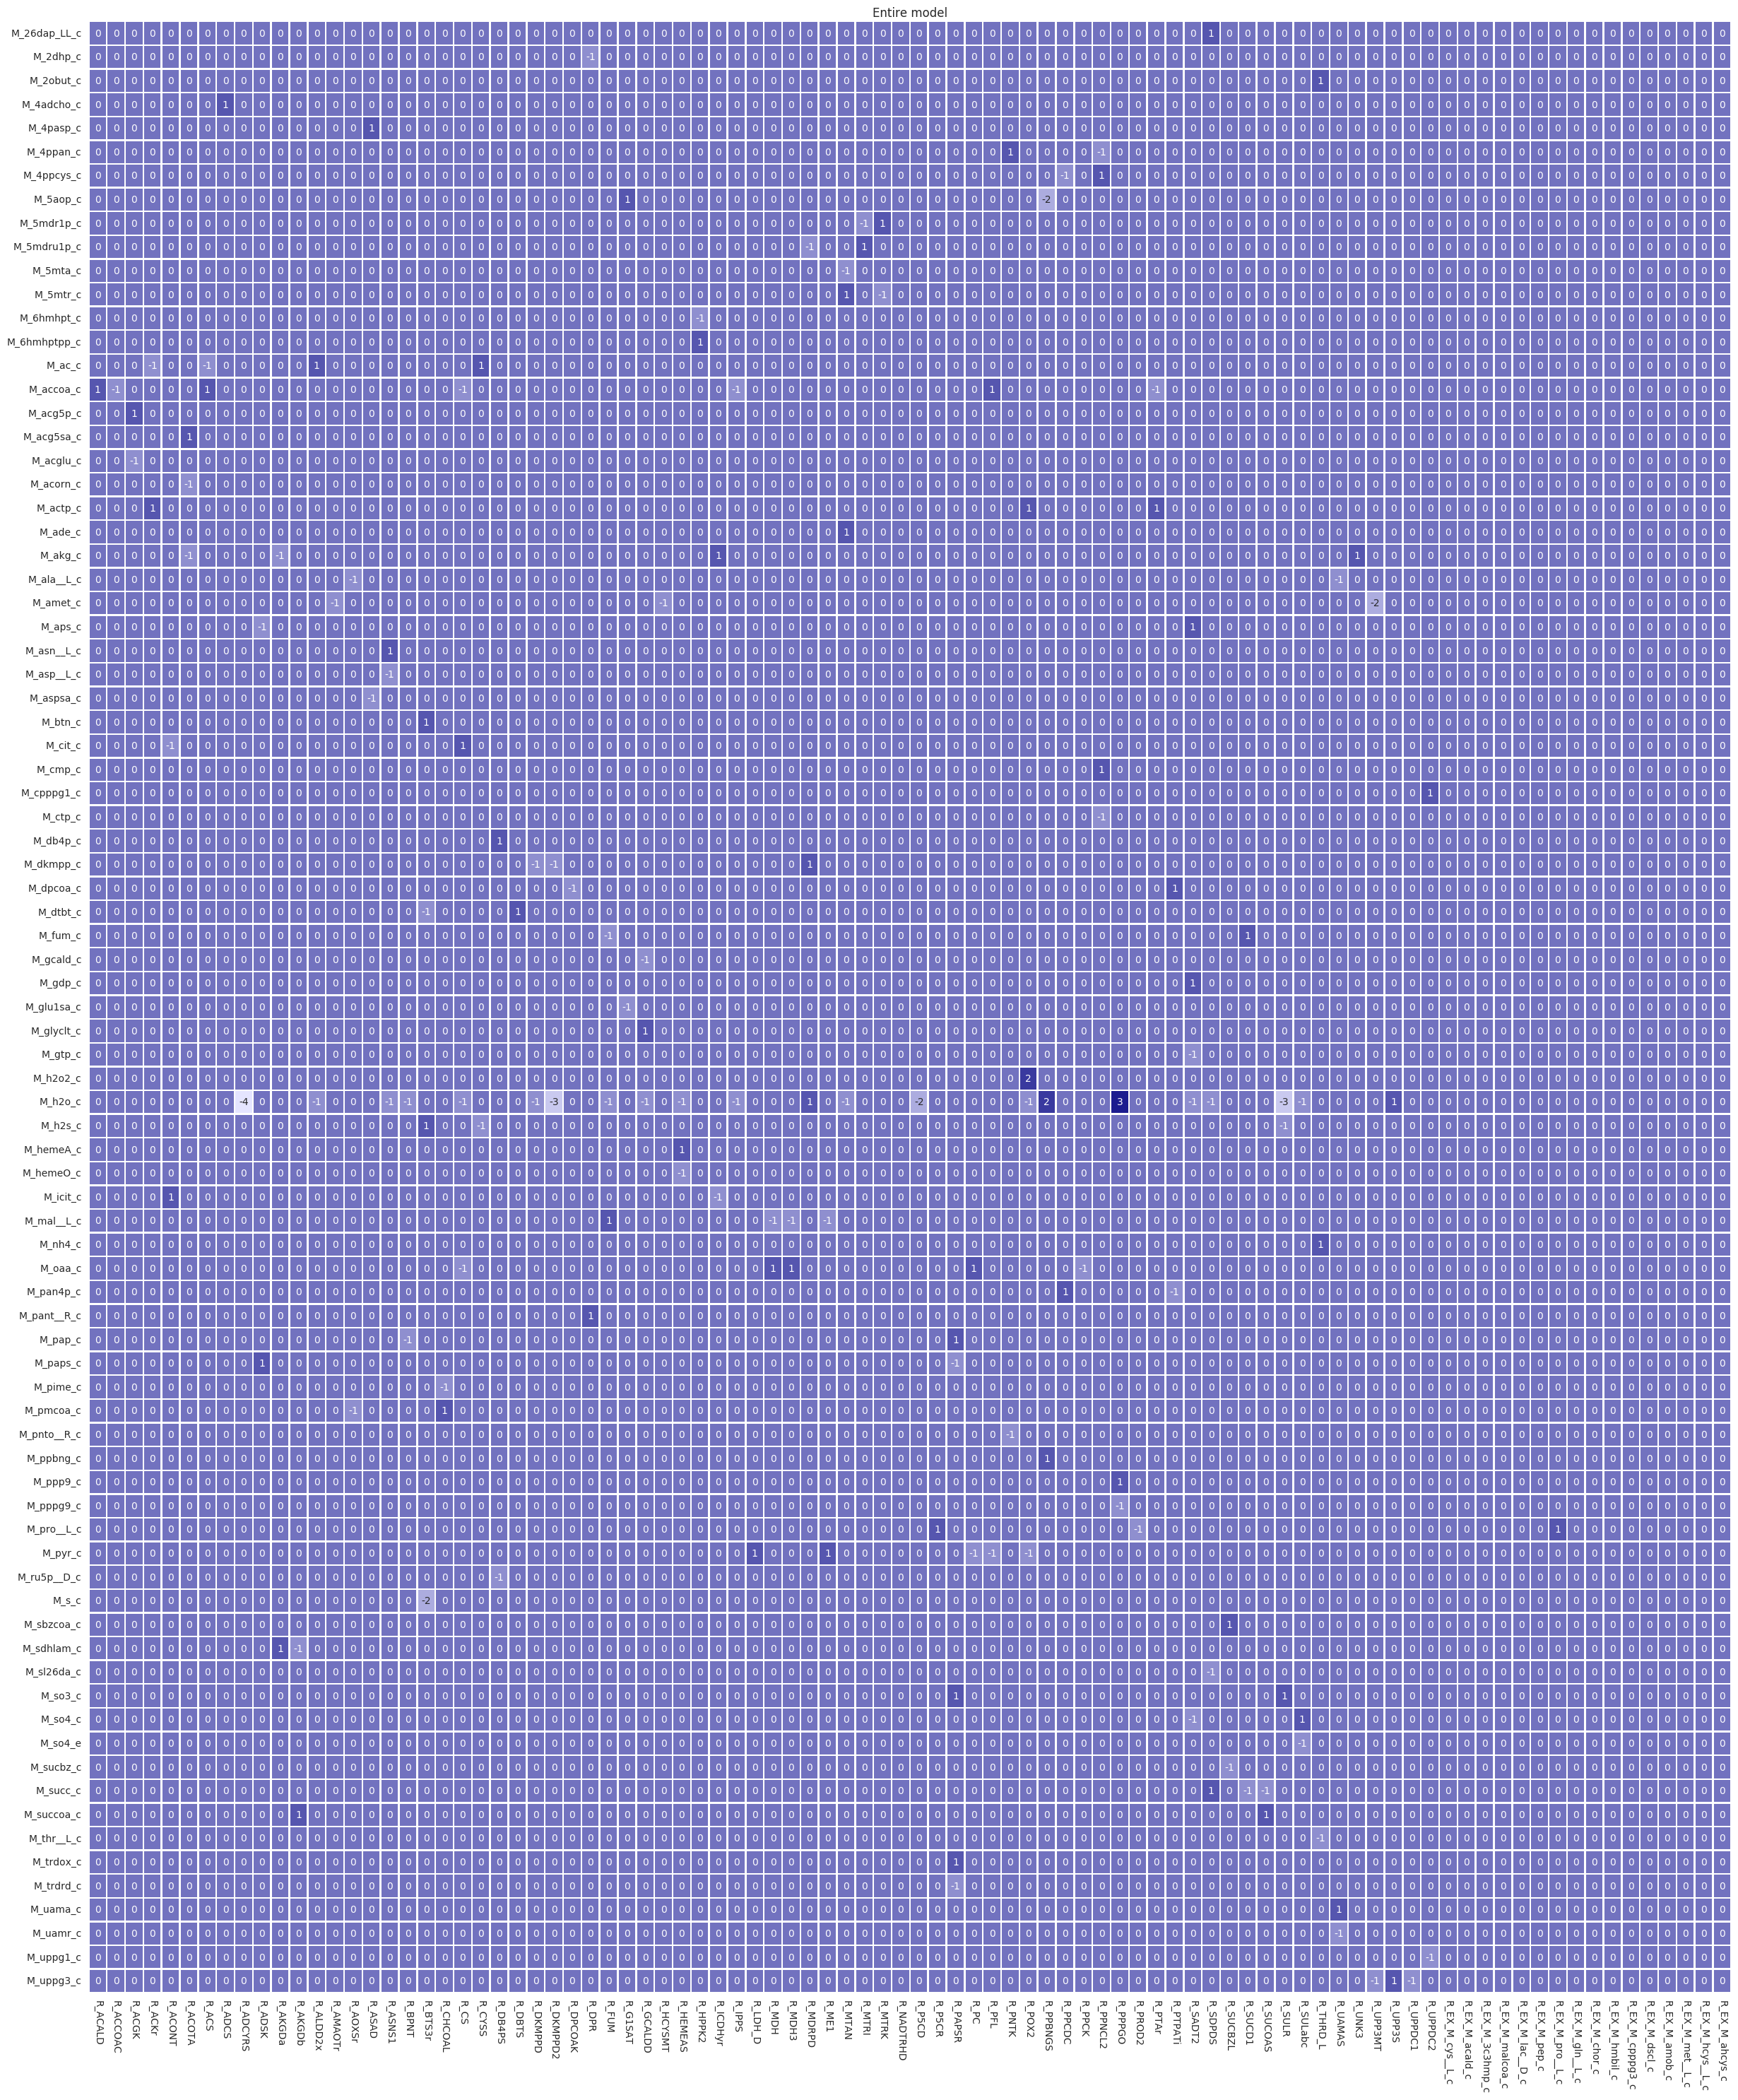

In [36]:
# load entire model
path2sbml_all = "../reduced_map/all_groups_with_fluxes_and_boundaries.xml"
model_all = te.loadSBMLModel(path2sbml_all)

# Get stoichiometric matrix for entire model
matrix_all = model_all.getFullStoichiometryMatrix()
# print matrix_all
print("Rank of entire model: %i" %(matrix_rank(matrix_all)))

# Creating pandas data frame
matrix_all_df = pd.DataFrame(matrix_all, index=matrix_all.rownames, columns=matrix_all.colnames)

# Changing the color palette to navy blue
pal = sns.light_palette("navy", as_cmap=True)
ax = sns.heatmap(matrix_all_df, linewidths=1, annot=True, cmap=pal, cbar=False)

# Rotate the labels for better legibility
plt.xticks(rotation=-90)
plt.title("Entire model")

# Creating and saving the respective figure
fig = ax.get_figure()
fig.set_size_inches(30, 36)
fig.savefig("heatmap_all_groups_with_fluxes_and_boundaries.png")

In [37]:
# Calculate the eigenvalues for entire model
eigenvals_all = model_all.getFullEigenValues() 
print "Eigenvalues of entire model: \n", eigenvals_all

Eigenvalues of entire model: 
[-1.00000000+0.j         -1.00000000+0.j         -1.00000000+0.j
 -1.00000000+0.j         -1.00000000+0.j         -1.00000000+0.j
 -1.17157288+0.j         -6.82842712+0.j         -0.38196601+0.j
 -2.61803399+0.j          0.00000000+0.j         -2.00000000+0.j
 -7.55137054+0.j         -6.08254301+0.j         -3.93410259-0.40112671j
 -3.93410259+0.40112671j -2.27738132+0.j         -4.34292308+0.j
 -1.39234386+0.j         -0.65690796+0.j         -0.35712224+0.j
 -0.81412590+0.j         -2.47068342+0.j         -1.00003800+0.000013j
 -0.99998700+0.00003801j -0.99996199-0.00001302j -1.00001302-0.000038j
 -0.18639350+0.j         -2.00000000+0.j         -3.00000000+0.j
 -1.00000000+0.j         -2.00000000+0.j         -3.00000000+0.j
 -3.00000000+0.j         -2.00000000+0.j          0.00000000+0.j
  0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
  0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
  0.00000000+0.j         -1.00000000+0.j